<a href="https://colab.research.google.com/github/Carlos3du/IDHM_Municipios_Brasil/blob/main/atvd1_avd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## IDHM dos Municípios Brasileiros



## Tratamento de dados

In [545]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import plotly.graph_objects as go

In [546]:
url = '/content/cidades.xlsx'

In [547]:
data_set = pd.read_excel(url, header = 3)

In [548]:
data_set.head(20)

,Município,Estado,IBGE_1-4,IDHM,IDHM_Renda,IDHM_Educacao,GDP_CAPITA,COMP_P,Valor Vazio
0,Mojuí Dos Campos,PA,NaN,NaN,NaN,NaN,8831.56,41.0,1
1,Paraíso Das Águas,MS,NaN,NaN,NaN,NaN,92163.92,3.0,1
2,Balneário Rincão,SC,NaN,NaN,NaN,NaN,17788.63,3.0,1
3,Pescaria Brava,SC,NaN,NaN,NaN,NaN,8341.33,14.0,1
4,Santa Terezinha,BA,126.0,NaN,NaN,NaN,6796.16,12.0,1
5,Pinto Bandeira,RS,NaN,NaN,NaN,NaN,18184.45,1.0,1
6,Lagoa Dos Patos,RS,NaN,NaN,NaN,NaN,NaN,NaN,1
7,Santa Teresinha,BA,NaN,0.590,0.549,0.459,NaN,NaN,1
8,São Caetano,PE,NaN,NaN,NaN,NaN,NaN,NaN,1
9,São Paulo,SP,514794.0,0.805,0.843,0.725,57071.43,16030.0,0


In [549]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5576 entries, 0 to 5575
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Município      5576 non-null   object 
 1   Estado         5576 non-null   object 
 2   IBGE_1-4       5568 non-null   float64
 3   IDHM           5568 non-null   float64
 4   IDHM_Renda     5568 non-null   float64
 5   IDHM_Educacao  5568 non-null   float64
 6   GDP_CAPITA     5573 non-null   float64
 7   COMP_P         5573 non-null   float64
 8   Valor Vazio    5576 non-null   int64  
dtypes: float64(6), int64(1), object(2)
memory usage: 392.2+ KB


In [550]:
data_set.fillna(0, inplace=True)

---


## **Cenário**




Um gestor público solicitou a uma consultoria um levantamento de diversas informações sobre os municípios brasileiros. O objetivo é estudar características e propor políticas adequadas nas áreas de Educação, Saúde e aumento de Renda. Para auxiliar nesse estudo, utilize a base de dados `cidades_do_brasil.xlsx`  e responda às seguintes perguntas:


---

## **Panorama Geral**

O primeiro indicador a ser analisado é o Índice de Desenvolvimento Humano Municipal (IDHM), que é composto por três dimensões: longevidade, educação e renda. O índice varia de 0 a 1, sendo que quanto mais próximo de 1, maior o desenvolvimento humano.

---

###**Quartil Inferior**

Qual o valor que separa os 25% dos municípios com os menores IDHM? Utilize o conceito de quartis.

In [551]:
fig = px.box(data_set, y='IDHM', title='Boxplot dos IDHMs')
fig.show()

In [552]:
menores_idhm = data_set['IDHM'].quantile(0.25)

print(f"O valor que separa os 25% dos municípios com os menores IDHM é de {menores_idhm}")

O valor que separa os 25% dos municípios com os menores IDHM é de 0.599




---





### **Concentração Geográfica**

Considerando os municípios com menor IDHM, existe uma concentração em algum estado ou distrito? Utilize o conceito de Pareto para fundamentar sua resposta.

In [553]:
menor_idhm = data_set[(data_set['IDHM'] <= menores_idhm)]
menor_idhm_sort = menor_idhm.sort_values(by='IDHM', ascending=True)

idhm_estado = menor_idhm_sort.groupby('Estado')['Município'].count().sort_values(ascending=False)

idhm_estado_por = idhm_estado / idhm_estado.sum() * 100
idhm_estado_acum = idhm_estado_por.cumsum()

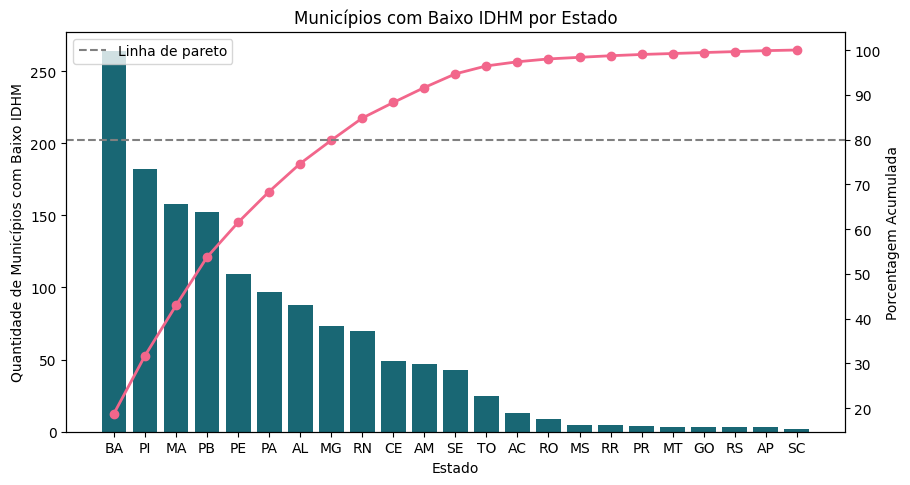

In [554]:

fig, ax1 = plt.subplots()


ax1.bar(idhm_estado.index, idhm_estado, color='#196774')
ax1.set_xlabel('Estado')
ax1.set_ylabel('Quantidade de Municípios com Baixo IDHM')

ax2 = ax1.twinx()
ax2.plot(idhm_estado.index, idhm_estado_acum, color='#F2668B', marker='o', linestyle='-', linewidth=2)
ax2.set_ylabel('Porcentagem Acumulada')



ax2.axhline(80, color='gray', linestyle='--', label='Linha de pareto')
plt.title('Municípios com Baixo IDHM por Estado')
plt.xticks(rotation=90)
plt.tight_layout()

# Aumentar tamanho do grafico
fig.set_size_inches(10, 5)

# Legendar elementos do grafico fora do gráfico
ax2.legend(loc='upper left')



plt.show()

**Análise:**
- Analisando o grafico e a linha de pareto em questão, é possível perceber que 80% das causas dos baixos IDHM do Brasil são por conta dos estados de MG, AL, PA, PE, PB, MA, PI e BA.


---

### **Classificação ONU**

A ONU classifica o IDH em quatro faixas:
  - Baixo: < 0,550
  - Médio: 0,550 - 0,699
  - Alto: 0,700 - 0,799
  - Muito Alto: >= 0,800

Pergunta: Com base nessa classificação, analise a situação atual do Brasil e de cada região.

In [555]:
# Agrupando osestados por região

estado_regiao = {
    'SP': 'Sudeste',
    'RJ': 'Sudeste',
    'MG': 'Sudeste',
    'ES': 'Sudeste',
    'RS': 'Sul',
    'SC': 'Sul',
    'PR': 'Sul',
    'BA': 'Nordeste',
    'PE': 'Nordeste',
    'CE': 'Nordeste',
    'MA': 'Nordeste',
    'PA': 'Norte',
    'AM': 'Norte',
    'RO': 'Norte',
    'AC': 'Norte',
    'TO': 'Norte',
    'MS': 'Centro-Oeste',
    'GO': 'Centro-Oeste',
    'DF': 'Centro-Oeste'
}

In [556]:
data_set['Região'] = data_set['Estado'].map(estado_regiao)

In [557]:
data_set.head()

,Município,Estado,IBGE_1-4,IDHM,IDHM_Renda,IDHM_Educacao,GDP_CAPITA,COMP_P,Valor Vazio,Região
0,Mojuí Dos Campos,PA,0.0,0.0,0.0,0.0,8831.56,41.0,1,Norte
1,Paraíso Das Águas,MS,0.0,0.0,0.0,0.0,92163.92,3.0,1,Centro-Oeste
2,Balneário Rincão,SC,0.0,0.0,0.0,0.0,17788.63,3.0,1,Sul
3,Pescaria Brava,SC,0.0,0.0,0.0,0.0,8341.33,14.0,1,Sul
4,Santa Terezinha,BA,126.0,0.0,0.0,0.0,6796.16,12.0,1,Nordeste


In [558]:
def classificar_idhm(idhm):
  if idhm < 0.550:
    return 'Baixo'
  elif idhm >= 0.550 and idhm <= 0.699:
    return 'Médio'
  elif idhm >= 0.700 and idhm <= 0.799:
    return 'Alto'
  elif idhm >= 0.800:
    return 'Muito Alto'

In [559]:
data_set['Classificação do IDHM'] = data_set['IDHM'].apply(classificar_idhm)

In [560]:
media_IDHM_regiao = data_set.groupby('Região')['IDHM'].mean()
media_IDHMRend_regiao = data_set.groupby('Região')['IDHM_Renda'].mean()
media_IDHMEdu_regiao = data_set.groupby('Região')['IDHM_Educacao'].mean()
media_COMP_P_regiao = data_set.groupby('Região')['COMP_P'].mean()

data_set['Media_IDHM'] = data_set['Região'].map(media_IDHM_regiao)
data_set['Media_IDHM_Renda'] = data_set['Região'].map(media_IDHMRend_regiao)
data_set['Media_IDHM_Educacao'] = data_set['Região'].map(media_IDHMEdu_regiao)
data_set['Media_COMP_P'] = data_set['Região'].map(media_COMP_P_regiao)

data_set.head(10)

,Município,Estado,IBGE_1-4,IDHM,IDHM_Renda,IDHM_Educacao,GDP_CAPITA,COMP_P,Valor Vazio,Região,Classificação do IDHM,Media_IDHM,Media_IDHM_Renda,Media_IDHM_Educacao,Media_COMP_P
0,Mojuí Dos Campos,PA,0.0,0.000,0.000,0.000,8831.56,41.0,1,Norte,Baixo,0.605158,0.590950,0.486671,19.680191
1,Paraíso Das Águas,MS,0.0,0.000,0.000,0.000,92163.92,3.0,1,Centro-Oeste,Baixo,0.689546,0.683402,0.585442,31.610429
2,Balneário Rincão,SC,0.0,0.000,0.000,0.000,17788.63,3.0,1,Sul,Baixo,0.711709,0.711025,0.610935,26.296731
3,Pescaria Brava,SC,0.0,0.000,0.000,0.000,8341.33,14.0,1,Sul,Baixo,0.711709,0.711025,0.610935,26.296731
4,Santa Terezinha,BA,126.0,0.000,0.000,0.000,6796.16,12.0,1,Nordeste,Baixo,0.593560,0.561402,0.496837,25.704478
5,Pinto Bandeira,RS,0.0,0.000,0.000,0.000,18184.45,1.0,1,Sul,Baixo,0.711709,0.711025,0.610935,26.296731
6,Lagoa Dos Patos,RS,0.0,0.000,0.000,0.000,0.00,0.0,1,Sul,Baixo,0.711709,0.711025,0.610935,26.296731
7,Santa Teresinha,BA,0.0,0.590,0.549,0.459,0.00,0.0,1,Nordeste,Médio,0.593560,0.561402,0.496837,25.704478
8,São Caetano,PE,0.0,0.000,0.000,0.000,0.00,0.0,1,Nordeste,Baixo,0.593560,0.561402,0.496837,25.704478
9,São Paulo,SP,514794.0,0.805,0.843,0.725,57071.43,16030.0,0,Sudeste,Muito Alto,0.699044,0.681238,0.608254,49.378443


In [561]:

from plotly.subplots import make_subplots

fig = make_subplots(rows=1, cols=3, subplot_titles=("IDHM", "IDHM Renda", "IDHM Educação"))


#363432
#196774
#F2668B
fig.add_trace(
    go.Bar(x=media_IDHM_regiao.index,y=media_IDHM_regiao.values, name='IDHM', marker=dict(color="#363432")),
    row=1, col=1,
)

fig.add_trace(
    go.Bar(x=media_IDHMRend_regiao.index,y=media_IDHMRend_regiao.values, name='IDHM Renda', marker=dict(color="#196774")),
    row=1, col=2
)

fig.add_trace(
    go.Bar(x=media_IDHMEdu_regiao.index,y=media_IDHMEdu_regiao.values, name='IDHM Educação', marker=dict(color="#F2668B")),
    row=1, col=3
)



fig.update_layout(title_text="Média dos Tipos de IDHM por Região")
fig.show()

In [562]:
proporcao_classificacao = data_set.groupby('Região')['Classificação do IDHM'].value_counts(normalize=True) * 100.0
proporcao_classificacao = proporcao_classificacao.reset_index(name='Proporção')

proporcao_classificacao_ds = pd.DataFrame(proporcao_classificacao)

proporcao_classificacao_ds.head()

,Região,Classificação do IDHM,Proporção
0,Centro-Oeste,Médio,51.840491
1,Centro-Oeste,Alto,47.239264
2,Centro-Oeste,Baixo,0.613497
3,Centro-Oeste,Muito Alto,0.306748
4,Nordeste,Médio,85.472637


In [563]:
fig = px.bar(proporcao_classificacao_ds, x='Região', y='Proporção', color='Classificação do IDHM', barmode='group',
             title='Classificação do IDHM por Região (%)', category_orders={"Classificação do IDHM": ["Baixo", "Médio", "Alto", "Muito Alto"]},  color_discrete_sequence=["#363432", "#196774", "#F2668B", "#F0941F"])

fig.show()

In [564]:
fig = make_subplots(rows=1, cols=2 ,subplot_titles=("IDHM Educação", "Empresas Educacionais"))


fig.add_trace(
    go.Bar(x=media_IDHMEdu_regiao.index,y=media_IDHMEdu_regiao.values, name='IDHM Educação', marker=dict(color="#F2668B")),
    row=1, col=1
)

fig.add_trace(
    go.Bar(x=media_COMP_P_regiao.index,y=media_COMP_P_regiao.values, name='Empresas Educacionais', marker=dict(color="#196774")),
    row=1, col=2
)


fig.update_layout(title_text="Médias dos IDHMs de Educação X Médias das Quantidades de Empresas Educacionais")
fig.show()



In [565]:
colunas = ['Região', 'Estado', 'IDHM_Educacao',  'IDHM_Renda', 'IDHM', 'GDP_CAPITA']

dados_tabela = data_set[colunas]

dados_norte = dados_tabela[data_set['Região'] == 'Norte']
norte = dados_norte.groupby('Estado').sum()

dados_nordeste = dados_tabela[data_set['Região'] == 'Nordeste']
nordeste = dados_nordeste.groupby('Estado').sum()

dados_centro_oeste = dados_tabela[data_set['Região'] == 'Centro-Oeste']
centro_oeste = dados_centro_oeste.groupby('Estado').sum()

dados_sudeste = dados_tabela[data_set['Região'] == 'Sudeste']
sudeste = dados_sudeste.groupby('Estado').sum()

dados_sul = dados_tabela[data_set['Região'] == 'Sul']
sul = dados_sul.groupby('Estado').sum()

norte.drop(columns=['Região'], inplace=True)
nordeste.drop(columns=['Região'], inplace=True)
centro_oeste.drop(columns=['Região'], inplace=True)
sudeste.drop(columns=['Região'], inplace=True)
sul.drop(columns=['Região'], inplace=True)


In [566]:
fig = make_subplots(rows=4, cols=5, subplot_titles=("Norte", "Nordeste", "Centro-Oeste", "Sudeste", "Sul"), vertical_spacing=0.06)

colors = {
    'IDHM': '#363432',
    'IDHM_Renda': '#196774',
    'IDHM_Educacao': '#F2668B',
    'GDP_CAPITA': '#F0941F'
}

regions = {
    'Norte': norte,
    'Nordeste': nordeste,
    'Centro-Oeste': centro_oeste,
    'Sudeste': sudeste,
    'Sul': sul
}


for col, (region_name, region_data) in enumerate(regions.items(), start=1):
    for row, data_type in enumerate(['IDHM', 'IDHM_Renda', 'IDHM_Educacao', 'GDP_CAPITA'], start=1):
        show_legend = (col == 1)
        fig.add_trace(
            go.Bar(x=region_data.index, y=region_data[data_type], name=data_type if show_legend else None, marker=dict(color=colors[data_type]), showlegend=show_legend),
            row=row, col=col
        )


fig.update_layout(
    title_text="Tipos de dados das Regiões por Estado",
    height=1000,
    width=1500,
)

# Legenda na esquerda

fig.update_layout(
    legend=dict(
        orientation="h",
        yanchor="top",
        y=1.08,
        xanchor="left",
        x=0.0,
        font=dict(size=14)
    )
)



# Adicionar espaço embaixo da legenda
fig.update_layout(margin=dict(t=150))


fig.show()


**Hipóteses:**

---

## **Educação Infantil**


### **Boxplot por Região**

Construa um boxplot da variável IDHM_Educacao por região (NO, NE, SE, S e CO). Comente as semelhanças e diferenças entre os gráficos.


In [567]:
fig = px.box(data_set, x="Região", y="IDHM_Educacao", title='IDHM de Educacao por Região')
fig.show()

**Semelhanças e Diferenças**

Semelhanças:
- Todas as regiões tem uma faixa de dispersão considerável, parecendo indicar que o IDHM de Educação varia regularmente em cada região do Brasil
- Observa-se que as medianas das regiões Centro-Oeste, Sul e Sudeste estão relativamente próximas, parecendo indicar um IDHM de Educação similar entre elas
- Assim como as medianas, os maiores valores dos quartis superiores também estão relativamente próximos. Oque pode indicar que as cidades com melhores desempenhos em cada uma dessas regiões têm IDHM de Educação semelhantes.

Diferenças
- O Norte tem a mediana mais baixa e maior desigualdade no IDHM Educação, com muitos outliers negativos.
- O Nordeste apresenta maior dispersão e mais outliers positivos.
- O Centro-Oeste é bastante homogêneo, com menor dispersão e poucos outliers.
- O Sudoeste é a região com menos outliers, porém com maior dispersão nos dados

---


### **Municípios com Mais Crianças**

Na região com a menor média de IDHM_Educacao, identifique os municípios que estão acima do 3º quartil nacional em relação à quantidade de crianças com idade entre 1 e 4 anos (variável IBGE_1-4).

In [568]:
view = media_IDHM_regiao.sort_values(ascending=True)
view

,IDHM
Região,
Nordeste,0.593560
Norte,0.605158
Centro-Oeste,0.689546
Sudeste,0.699044
Sul,0.711709


In [569]:
pd.set_option('display.max_rows', None)

quartil_nac = data_set['IBGE_1-4'].quantile(0.75)

ds_nordeste = data_set[(data_set['Região'] == 'Nordeste')]
municipio_quartil = ds_nordeste[(ds_nordeste['IBGE_1-4'] > quartil_nac)]

municipio_quartil[['Município', 'IBGE_1-4']] = municipio_quartil[['Município', 'IBGE_1-4']].sort_values(by='IBGE_1-4', ascending=False)

municipio_quartil[['Município', 'IBGE_1-4']].reset_index()

,index,Município,IBGE_1-4
0,16,Recife,54720.0
1,19,Salvador,91470.0
2,24,Fortaleza,129766.0
3,45,Barreiras,8402.0
4,71,São Luís,54955.0
5,79,Balsas,5853.0
6,86,Feira De Santana,26735.0
7,100,Imperatriz,15491.0
8,142,Camaçari,5982.0
9,144,Jaboatão Dos Guararapes,22956.0


---



### **Empresas de Educação**

Identifique os municípios que estão no 1º quartil nacional em relação à quantidade de empresas do setor educacional (variável COMP_P). Dessa forma, vamos priorizar municípios com poucas empresas de educação.

In [570]:
pd.set_option('display.max_rows', None)

quartil_nac = data_set['COMP_P'].quantile(0.25)

municipio_quartil = ds_nordeste[(ds_nordeste['COMP_P'] == quartil_nac)]

municipio_quartil[['Município', 'COMP_P']].reset_index()

,index,Município,COMP_P
0,654,Parambu,2.0
1,1072,Frecheirinha,2.0
2,1377,Ipaumirim,2.0
3,1402,Gameleira,2.0
4,1532,Ipecaetá,2.0
5,1645,Saúde,2.0
6,1821,Tremedal,2.0
7,1826,Alto Alegre Do Pindaré,2.0
8,1876,São João Do Paraíso,2.0
9,1877,Iaçu,2.0


In [571]:
mean_line = municipio_quartil['IDHM_Educacao'].mean()
mean_line

0.4759130434782609

In [572]:
fig = px.histogram(municipio_quartil, x='Município', y='IDHM_Educacao',title = 'Municípios com Poucas Empresas Educacionais e seus IDHM de Educacao por Estado',
                   color="Estado", color_discrete_sequence=["#363432", "#196774", "#F0941F", "#F2668B"])

fig.show()

In [573]:
abaixo_media = municipio_quartil[municipio_quartil['IDHM_Educacao'] < mean_line]
abaixo_media_ds = abaixo_media.groupby('Estado')['IDHM_Educacao'].count().sort_values(ascending=False).reset_index().rename(columns={'IDHM_Educacao': 'Qntd Abaixo da média'})

fig =  px.pie(abaixo_media_ds, values='Qntd Abaixo da média', names='Estado', title='Percentual dos IDHMs de Educacao Abaixo da Média por Estado')

# Diminuir a figura
fig.update_layout(width=700, height=500)
fig.update_traces(textposition='inside', textinfo='percent+label', textfont_size=16, hole=.3, marker_colors=["#363432", "#196774", "#F0941F", "#F2668B"])
fig.show()


---

### **Prioridade de Investimento**

Considerando as análises anteriores, proponha uma ordem de priorização para investimento na educação dessa região.



**Plano de Prioridade de Investimento:**
<br><br>

1. **Melhor Infraestrutura Educacional**

  Foi observado na análise que os estados da Bahia e de Pernambuco possuem os piores indicadores educacionais, e acredito que evidencie a necessidade de um maior investimento no setor educacional. O investimento deve priorizar a melhoria de infraestruturas, a formação de professores, e a atração de empresas educacionais.

<br>

2. **Influência dos Centros Urbanos**

  Por Salvador e Recife serem centros urbanos com maior capacidade de influenciar áreas vizinhas, o foco deve ser em fortalecer as escolas e universidades, além de atrair mais investimentos públicos e privados para a educação. Já que se observa que dados de desenvolvimento urbano mostram que centros maiores com melhores índices de desenvolvimento atraem mais investimentos e melhoram a educação nas áreas circundantes.

<br>

3. **Formação Técnica e Educação de Adultos**

  Dar ênfase no Nordeste e focar em programas de educação técnica e de adultos, visto que Estudos comprovam que a qualificação técnica e a educação de adultos contribuem para o desenvolvimento econômico e social da região.



<br>

4. **Atrair Empresas Educacionais**

  Atrair empresas educacionais para o Nordeste por meio de incentivos fiscais e parcerias público-privadas, aumentando a inovação no ensino e o uso de tecnologias educacionais na região. Já que há uma baixa média de empresas educacionais e acredito que isso reflita a necessidade de atrair mais companhias do setor.

---